In [143]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)


fs=16 #fontsize

#Colors + Labels

color_sequence = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

cNEDE=color_sequence[3]
cOEDE=color_sequence[4]
cADE=color_sequence[1]
cDR=color_sequence[0]
cLCDM=color_sequence[2]
cSHOES='gray'

In [144]:
#          omega_b, omega_cdm, h,  ln10^{10}A_s,    n_s,tau_reio,frac_EDE,log10z, 3w
EDE_params=[2.279172e-02,1.283038e-01,7.053332e-01,3.054141e+00,9.847891e-01,5.417595e-02,1.065318e-01,3.675834e+00,2.061436e+00]
EDE2_params=[2.307324e-02,1.325338e-01,7.266549e-01,3.092596e+00,9.924328e-01,6.654461e-02,1.653329e-01,3.636614e+00,2.045009e+00,4.532702e-03]

# omega_b,omega_cdm,h,ln10^{10}A_s,n_s,tau_reio, 
LCDM_params=[2.251350e-02,1.183155e-01,6.816150e-01,3.053159e+00,9.697571e-01,5.981617e-02]
#run212

 



N_ur = 2.0328
N_ncdm = 1
m_ncdm = 0.06
T_ncdm = 0.71611

In [145]:
LCDM = Class()
LCDM.set({'output':'tCl,pCl,lCl','lensing':'yes',
          'omega_b':LCDM_params[0],'omega_cdm':LCDM_params[1],'h':LCDM_params[2],'ln10^{10}A_s':LCDM_params[3],
          'n_s':LCDM_params[4],'tau_reio':LCDM_params[5],'k_output_values':'0.00001,0.001,0.01,0.04,0.5',
          'output':'tCl,pCl,lCl,mPk',
          'N_ur':N_ur, 'N_ncdm':N_ncdm, 'm_ncdm':m_ncdm, 'T_ncdm':T_ncdm,
          'P_k_max_1/Mpc':1.0,'z_max_pk': 3.,'l_switch_limber':9
          })
LCDM.compute()
LCDM_bg = LCDM.get_background()
LCDM_pert = LCDM.get_perturbations()


In [232]:
NEDE = Class()
NEDE2 = Class()
NEDE3 = Class()


NEDE2.set({'sub_dom_cond':1.e-6,'back_integration_stepsize':1.e-3,'decay_res_enhancement':100,'Junction_tag':1,
          'perturb_sampling_stepsize': 0.003,
         'perturb_integration_stepsize':0.5,
         'tol_perturb_integration': 1.0e-8,
         'three_eos_NEDE':EDE2_params[8],
         'three_cvis2_NEDE':0,'f_NEDE': EDE2_params[6],'z_decay_NEDE' : 10**EDE2_params[7],
         'omega_b':EDE2_params[0],'omega_cdm':EDE2_params[1],'h':EDE2_params[2],'ln10^{10}A_s':EDE2_params[3],
         'n_s':EDE2_params[4],'tau_reio':EDE2_params[5],
         'H_over_m_NEDE':0.2,'k_output_values':'0.00001,0.001,0.01,0.1,0.5',
        'start_small_k_at_tau_c_over_tau_h':0.0000001,
         'output':'tCl,pCl,lCl,mPk','lensing':'yes','background_verbose':'4','perturbations_verbose':'2',
         'NEDE_trigger_fluid_H_m':0.001,
         'trigger_resolution':0.005,
         'P_k_max_1/Mpc':1.0,'z_max_pk': 3.,'l_switch_limber':9,
         'Omega0_NEDE_trigger_DM':EDE2_params[9]*5,
         }
         )



         





NEDE2.compute()


Running CLASS version v2.9.4
Running TriggerCLASS version v6.1 
Computing background
New EDE decayed at redshift: 4331.145523 ; fraction New EDE: 0.165337; fraction trigger field: 2.859852e-02 
Integration stepsize is being being continously reduced to describe fast trigger oscillations from z = 4320.246924 on. 
NEDE trigger described in terms of cycle-averaged effective fluid at z = 168.391050, tau = 909.035150 and H/m = 0.001000; cycle length (in units of 2Pi/m): 102.900969 
 -> age = 12.765233 Gyr
 -> conformal age = 13089.873831 Mpc
 -> pba->Neff = 3.046000
 -> NEDE background details:
     -> NEDE decay time: 4331.15 
     -> NEDE fraction: 0.1653 
     -> Scenario A with eos NEDE: 3*w = 2.05 
     -> Percolation trigger (H/m): 0.200000 
     -> closure check: H/H0-1: -5.913183e-09 
     -> Decay resolution enhancement: 1.000000e+02 
     -> Omega_trigger = 0.0226635, Trigger_ini (in Planck units)= 0.232017 
     -> Trigger contribution to DM: yes  
     -> Fluid approximation for

In [233]:



NEDE.set({'sub_dom_cond':1.e-6,'back_integration_stepsize':5.e-3,'decay_res_enhancement':100,'Junction_tag':1,
         'perturb_sampling_stepsize': 0.1,
         'perturb_integration_stepsize':0.1,
         'tol_perturb_integration': 1.0e-8,
         'three_eos_NEDE':EDE2_params[8],
         'three_cvis2_NEDE':0,'f_NEDE': EDE2_params[6],'z_decay_NEDE' : 10**EDE2_params[7],
         'omega_b':EDE2_params[0],'omega_cdm':EDE2_params[1],'h':EDE2_params[2],'ln10^{10}A_s':EDE2_params[3],
         'n_s':EDE2_params[4],'tau_reio':EDE2_params[5],
         'H_over_m_NEDE':0.2,'k_output_values':'0.00001,0.001,0.01,0.1,0.5',
        'start_small_k_at_tau_c_over_tau_h':0.0000001,
         'output':'tCl,pCl,lCl,mPk','lensing':'yes','background_verbose':'4','perturbations_verbose':'2',
         'NEDE_trigger_fluid_H_m':0.01,
         'trigger_resolution':0.05,
         'P_k_max_1/Mpc':1.0,'z_max_pk': 3.,'l_switch_limber':9,
         'Omega0_NEDE_trigger_DM':EDE2_params[9]*5,
         }
         )
         

NEDE.compute()

Running CLASS version v2.9.4
Running TriggerCLASS version v6.1 
Computing background
New EDE decayed at redshift: 4331.221606 ; fraction New EDE: 0.165347; fraction trigger field: 2.860369e-02 
Integration stepsize is being being continously reduced to describe fast trigger oscillations from z = 2955.725002 on. 
NEDE trigger described in terms of cycle-averaged effective fluid at z = 1475.287752, tau = 208.043584 and H/m = 0.029926; cycle length (in units of 2Pi/m): 3.072499 
 -> age = 12.765232 Gyr
 -> conformal age = 13089.871321 Mpc
 -> pba->Neff = 3.046000
 -> NEDE background details:
     -> NEDE decay time: 4331.22 
     -> NEDE fraction: 0.1653 
     -> Scenario A with eos NEDE: 3*w = 2.05 
     -> Percolation trigger (H/m): 0.200000 
     -> closure check: H/H0-1: 1.092165e-09 
     -> Decay resolution enhancement: 1.000000e+02 
     -> Omega_trigger = 0.0226635, Trigger_ini (in Planck units)= 0.232044 
     -> Trigger contribution to DM: yes  
     -> Fluid approximation for t

In [128]:


NEDE_derived=NEDE.get_current_derived_parameters(['z_decay','z_rec','H0','sigma8'])
NEDE_bg = NEDE.get_background()
NEDE2_bg = NEDE2.get_background()


NEDE_z_decay=NEDE_derived['z_decay']
NEDE_z_rec=NEDE_derived['sigma8']
NEDE_sigma8=NEDE_derived['z_decay']
NEDE_a_decay=1/(NEDE_z_decay+1)
NEDE_a_rec=1/(NEDE_z_rec+1)
NEDE_Dstar=NEDE.angular_distance(NEDE_z_rec)*(NEDE_z_rec+1)




#print(EDE.Hubble(EDE_z_decay) * EDE_a_decay)
#print(EDE.Hubble(EDE_z_rec) * EDE_a_rec)
#print(EDE_a_decay)

#EDE.Neff()


#print("Neff EDE: " + str(EDE.Neff()))
#print("Neff DR: " + str(DR.Neff()))
#print("Neff LCDM: " + str(LCDM.Neff()))

a_NEDE=1/(NEDE_bg['z']+1)
H_NEDE=NEDE_bg['H [1/Mpc]']
H0_NEDE=H_NEDE[-1]

a_NEDE2=1/(NEDE2_bg['z']+1)
H_NEDE2=NEDE2_bg['H [1/Mpc]']
H0_NEDE2=H_NEDE2[-1]




NEDE_pert = NEDE.get_perturbations()
NEDE_pert2 = NEDE2.get_perturbations()
#EDE_pert['scalar'][1].keys()
#print(EDE_bg.keys())




#Calculate the l of a mode that crosses horizon at z


#test=np.interp(1./(147.1+1), a, EDE_bg['H [1/Mpc]'])

#print(EDE_bg['z'][-5000],EDE_bg['H [1/Mpc]'][-5000],test)

#print(conf_time[-1],a[-1],2/H[-1],H[-1],EDE.angular_distance(1100)*1100)


def l_z(zvar):
    #z_rec=EDE.get_current_derived_parameters(['z_rec'])['z_rec']
    #Dstar=EDE.angular_distance(EDE_z_rec)*(EDE_z_rec+1)
    H_z=np.interp(1./(zvar+1), a_EDE, EDE_bg['H [1/Mpc]'])
    return H_z/(1+zvar)*EDE_Dstar


def l_k(kvar):
    return EDE_Dstar*kvar




def rs_z(zvar,bg):
    H_arr=bg['H [1/Mpc]']
    z_arr=bg['z']
    rs_arr=bg['comov.snd.hrz.']
    pos_z=np.argmin(np.abs(z_arr-zvar))
    rs_EDE=-np.trapz(1/H_arr[0:pos_z]*1/np.sqrt(3),x=z_arr[0:pos_z])
    return (rs_EDE,rs_arr[pos_z])
    
    
#print(l_z(1000),1000,EDE_Dstar,l_k(0.015),l_z(EDE_z_decay),1/rs_z(EDE_z_decay,EDE_bg)[1],l_k(0.0239))
print(NEDE_sigma8)

4331.145523370116


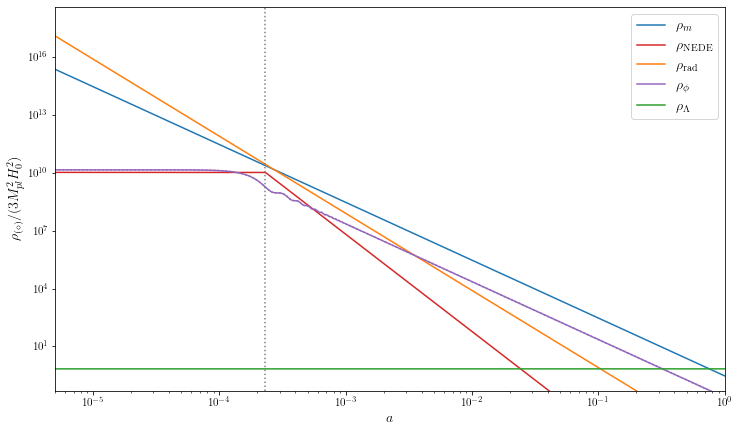

In [129]:
fs=14
rho_rad=np.zeros(a_NEDE.size)
rho_EDE=NEDE_bg['(.)rho_NEDE']



decay_pos=np.argmin(np.abs(NEDE_a_decay-a_NEDE))
#rho_rad[decay_pos:]=rho_EDE[decay_pos:]
rho_rad=rho_rad+NEDE_bg['(.)rho_g']+NEDE_bg['(.)rho_ur']


plt.rcParams['figure.figsize'] = [12, 24]
ax1 = plt.subplot(311)
plt.loglog(a_NEDE, (NEDE_bg['(.)rho_cdm']+NEDE_bg['(.)rho_b'])/H0_NEDE**2,label=r'$\rho_m$',c=color_sequence[0])
plt.loglog(a_NEDE, rho_EDE/H0_NEDE**2,label=r'$\rho_{\rm NEDE}$',c=color_sequence[3])       
plt.loglog(a_NEDE, rho_rad/H0_NEDE**2,label=r'$\rho_{\rm rad}$',c=color_sequence[1])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_trigger']/H0_NEDE**2,label=r'$\rho_{\phi}$',c=color_sequence[4])
plt.loglog(a_NEDE2, NEDE2_bg['(.)rho_trigger']/H0_NEDE**2,ls=':',c=color_sequence[4])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_lambda']/H0_NEDE**2,label=r'$\rho_{\Lambda}$',c=color_sequence[2])
#plt.loglog(a_EDE2, EDE2_bg['(.)rho_lambda']/H0_EDE2**2,ls=':',c=color_sequence[2])
plt.axvline(x=NEDE_a_decay,ls=':',c='gray')
plt.xlim((0.000005,1))


plt.ylim((0.05,0.4e19))


plt.xlabel(r'$a$',fontsize=fs)
ax1.set_ylabel(r'$\rho_{(\circ)} / (3M_{pl}^2 H_0^2)$', fontsize=fs)
plt.legend(fontsize=14)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.savefig('fld_bg.pdf',bbox_inches='tight')
plt.show()
plt.close('all')





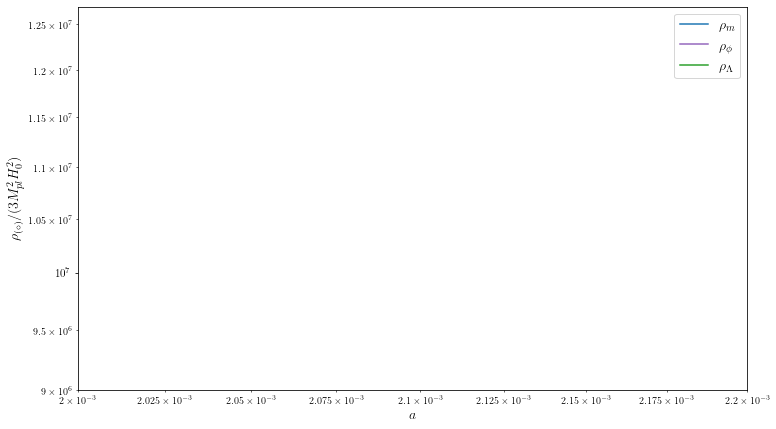

In [130]:
fs=14
rho_rad=np.zeros(a_NEDE.size)
rho_EDE=NEDE_bg['(.)rho_NEDE']



decay_pos=np.argmin(np.abs(NEDE_a_decay-a_NEDE))
#rho_rad[decay_pos:]=rho_EDE[decay_pos:]
rho_rad=rho_rad+NEDE_bg['(.)rho_g']+NEDE_bg['(.)rho_ur']


plt.rcParams['figure.figsize'] = [12, 24]
ax1 = plt.subplot(311)
plt.loglog(a_NEDE, (NEDE_bg['(.)rho_cdm']+NEDE_bg['(.)rho_b'])/H0_NEDE**2,label=r'$\rho_m$',c=color_sequence[0])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_trigger']/H0_NEDE**2,label=r'$\rho_{\phi}$',c=color_sequence[4])
plt.loglog(a_NEDE2, NEDE2_bg['(.)rho_trigger']/H0_NEDE**2,ls=':',c=color_sequence[4])
plt.loglog(a_NEDE, NEDE_bg['(.)rho_lambda']/H0_NEDE**2,label=r'$\rho_{\Lambda}$',c=color_sequence[2])
#plt.loglog(a_EDE2, EDE2_bg['(.)rho_lambda']/H0_EDE2**2,ls=':',c=color_sequence[2])
plt.axvline(x=NEDE_a_decay,ls=':',c='gray')
plt.xlim((0.0020,0.0022))

plt.ylim((9.e6,12.7e6))

plt.xlabel(r'$a$',fontsize=fs)
ax1.set_ylabel(r'$\rho_{(\circ)} / (3M_{pl}^2 H_0^2)$', fontsize=fs)
plt.legend(fontsize=14)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.savefig('fld_bg.pdf',bbox_inches='tight')
plt.show()
plt.close('all')






No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


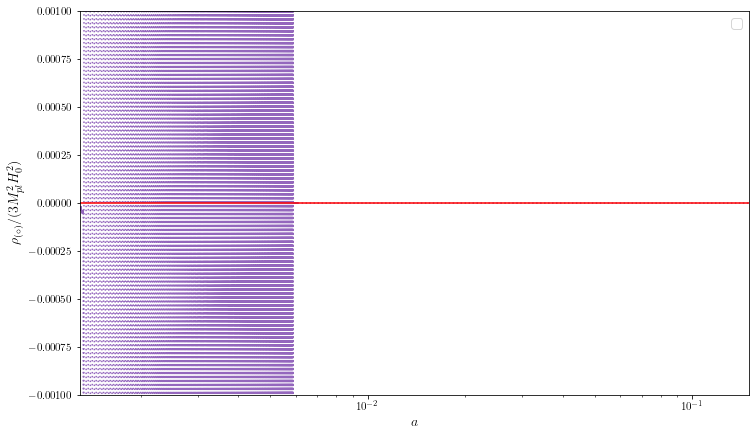

In [131]:
fs=14
rho_rad=np.zeros(a_NEDE.size)
rho_EDE=NEDE_bg['(.)rho_NEDE']



decay_pos=np.argmin(np.abs(NEDE_a_decay-a_NEDE))
#rho_rad[decay_pos:]=rho_EDE[decay_pos:]
rho_rad=rho_rad+NEDE_bg['(.)rho_g']+NEDE_bg['(.)rho_ur']
diff_trigger=(-np.interp(a_NEDE2,a_NEDE,NEDE_bg['(.)rho_trigger'])+NEDE2_bg['(.)rho_trigger'])
rho_fld=np.interp(a_NEDE2,a_NEDE,NEDE_bg['(.)rho_trigger'])


plt.rcParams['figure.figsize'] = [12, 24]
ax1 = plt.subplot(311)

plt.semilogx(a_NEDE2, diff_trigger/rho_fld,ls=':',c=color_sequence[4])

#plt.loglog(a_EDE2, EDE2_bg['(.)rho_lambda']/H0_EDE2**2,ls=':',c=color_sequence[2])
plt.axvline(x=NEDE_a_decay,ls=':',c='gray')
plt.axhline(y=0., color='r', linestyle='-')
plt.xlim((0.0013,0.15))

plt.ylim((-0.001,0.001))

plt.xlabel(r'$a$',fontsize=fs)
ax1.set_ylabel(r'$\rho_{(\circ)} / (3M_{pl}^2 H_0^2)$', fontsize=fs)
plt.legend(fontsize=14)
plt.setp(ax1.get_xticklabels(), fontsize=11)
plt.setp(ax1.get_yticklabels(), fontsize=11)
plt.show()
plt.close('all')

<Figure size 2160x3600 with 0 Axes>

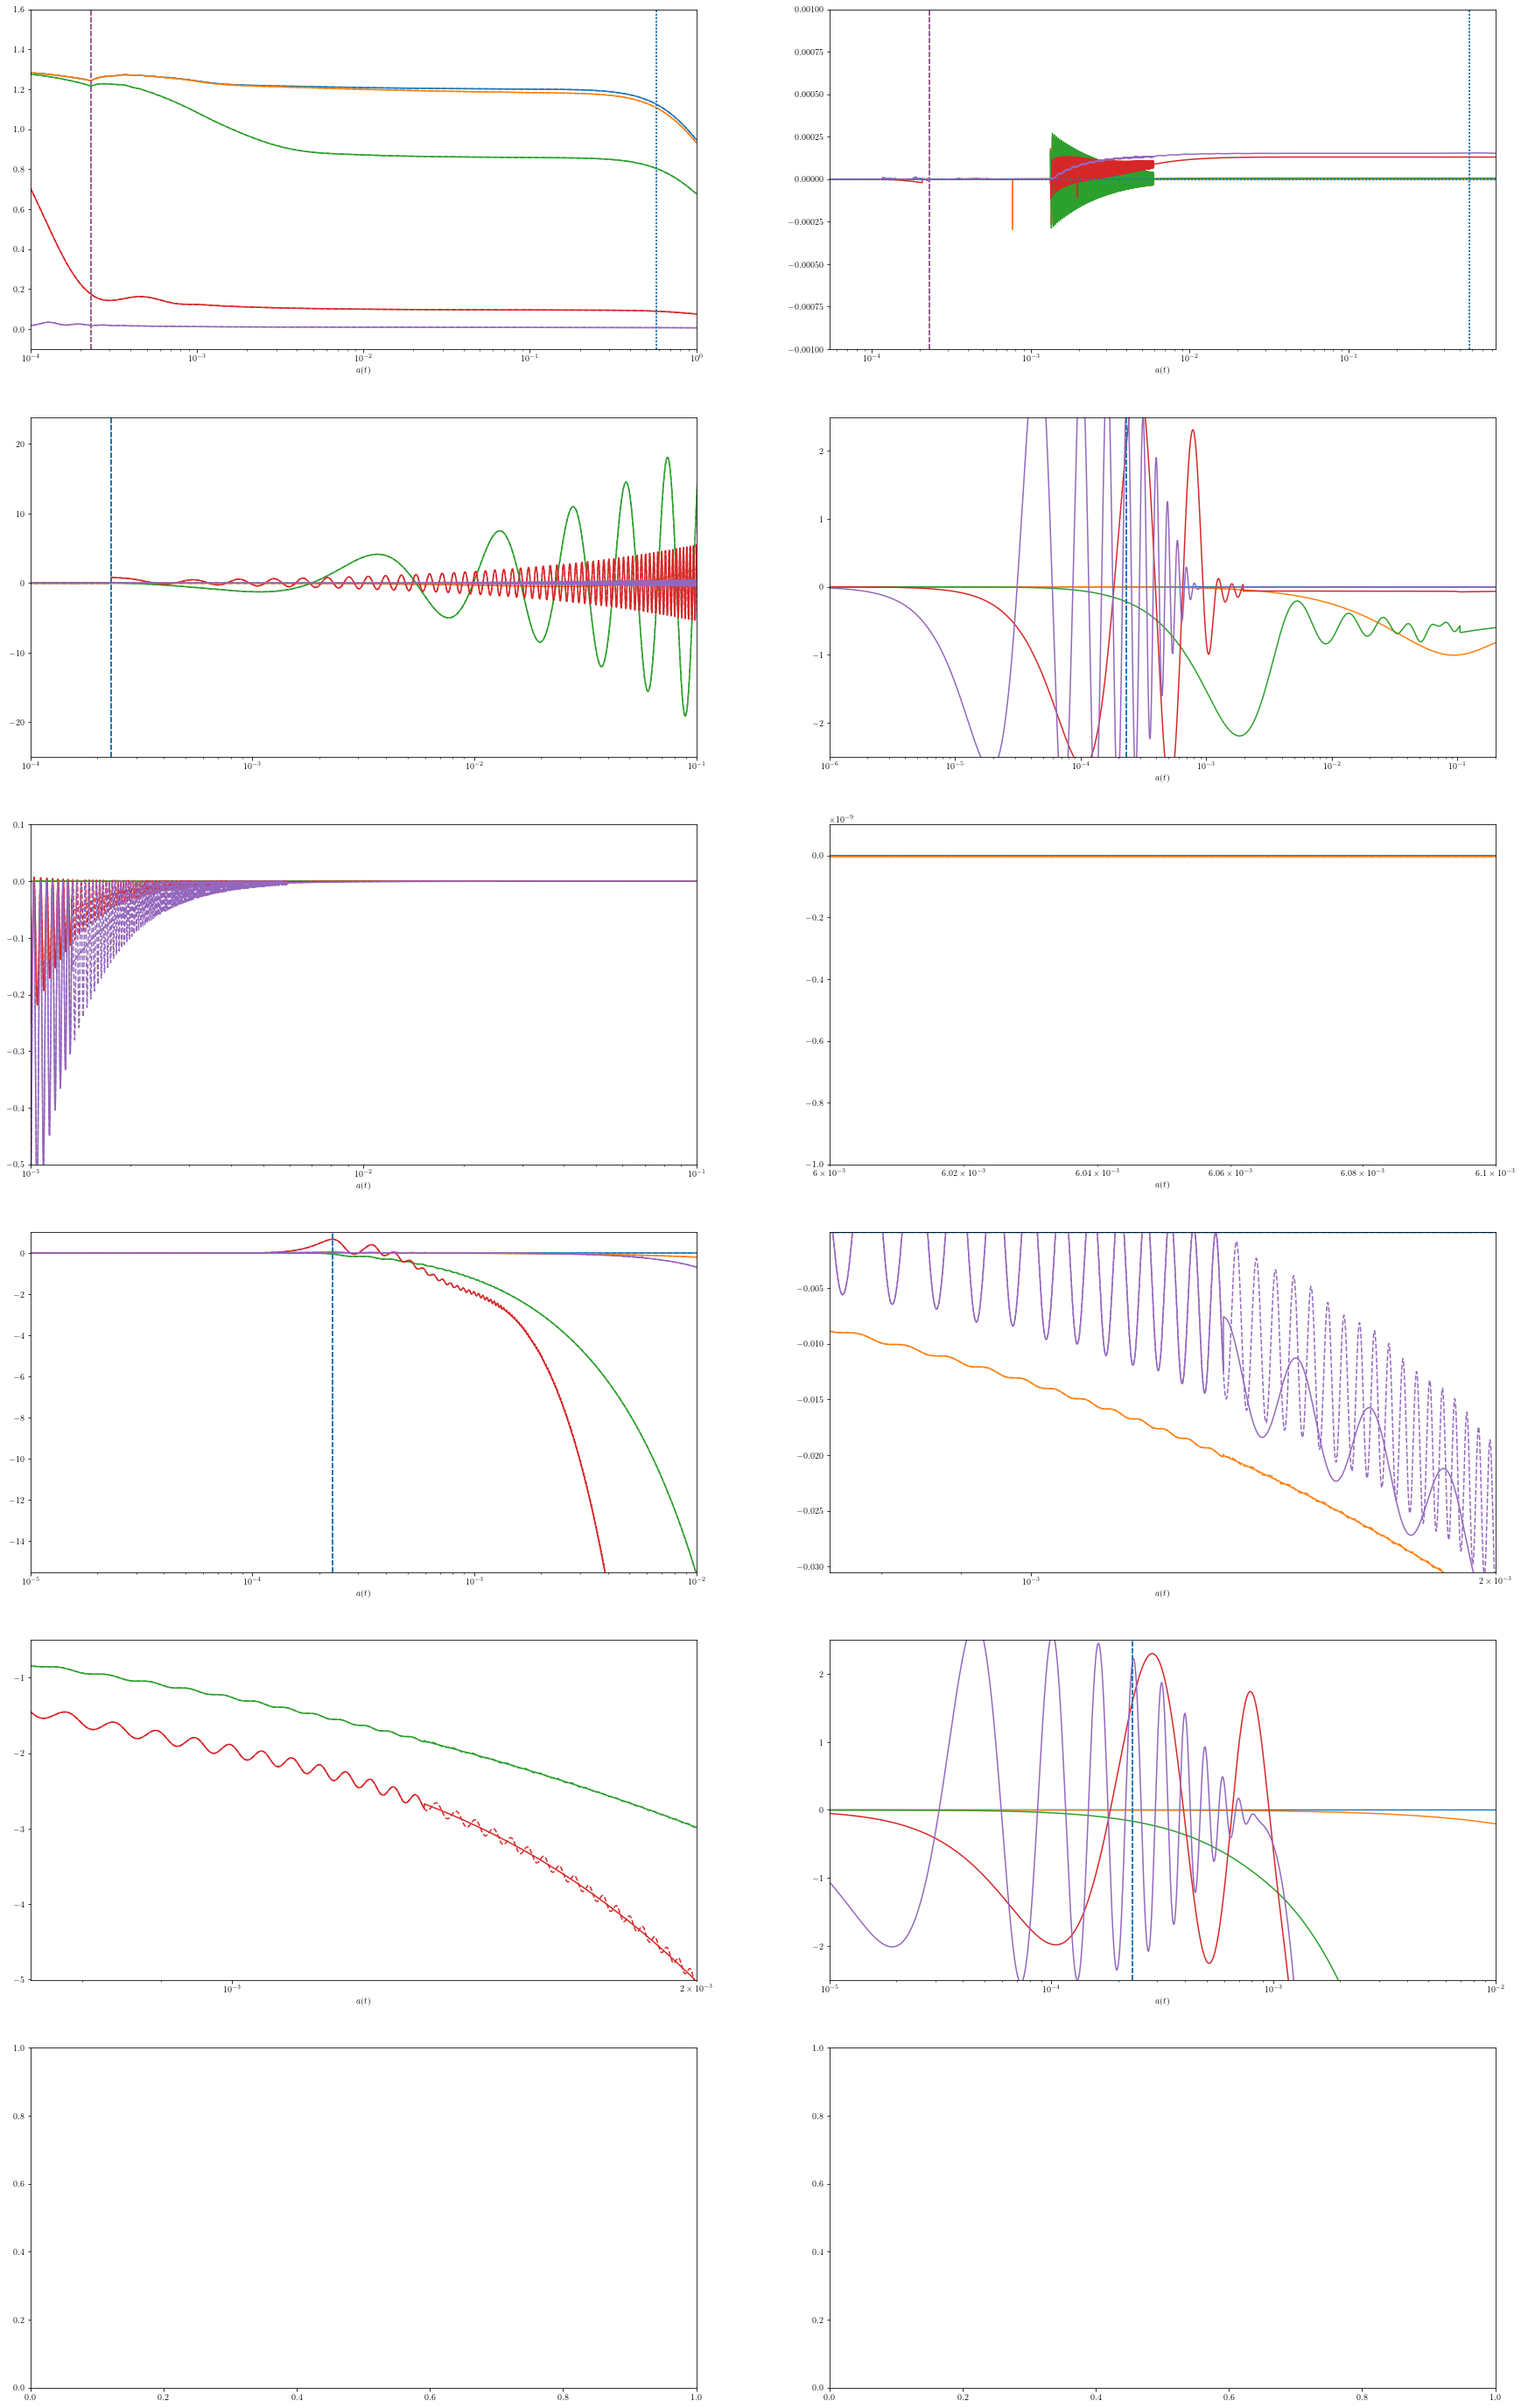

In [132]:
NEDE_sarray = NEDE_pert['scalar']
NEDE2_sarray = NEDE_pert2['scalar']
#LCDM_sarray = LCDM_pert['scalar']

plt.rcParams['figure.figsize'] = [30, 50]
plt.subplots_adjust(hspace=0.1)

fig, ((ax1, ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8),(ax9,ax10),(ax11,ax12)) = plt.subplots(6, 2)
#fig, ((ax1, ax2)) = plt.subplots(1, 2)

for i in range(5):
    NEDE_sdict = NEDE_sarray[i]
    NEDE_a = NEDE_sdict['a']
    NEDE2_sdict = NEDE2_sarray[i]
    NEDE2_a = NEDE2_sdict['a']
    
    #LCDM_sdict = LCDM_sarray[i]
    #LCDM_a = LCDM_sdict['a']
    

    NEDE_perturb = NEDE_sdict['psi']+NEDE_sdict['phi']
    NEDE2_perturb = NEDE2_sdict['psi']+NEDE2_sdict['phi']
    ax1.semilogx(NEDE_a,NEDE_perturb,color=color_sequence[i])
    ax1.semilogx(NEDE2_a,NEDE2_perturb,color=color_sequence[i],ls='--')
    ax1.axvline(x=NEDE_a_decay,ls='--',color=color_sequence[i])
    ax1.axvline(x=NEDE_a_rec,ls=':')
    ax1.set_xlim((0.00010,1))
    #ax1.set_xlim((0.00075,0.0008))
    ax1.set_xlabel(r"$a(t)$")
    ax1.set_ylim((-0.1,1.6))
    #ax1.set_ylim((1.2,1.29))


    diff_Weyl=(-np.interp(NEDE2_a,NEDE_a,NEDE_perturb)+NEDE2_perturb)/np.interp(NEDE2_a,NEDE_a,NEDE_perturb)
    
    ax2.semilogx(NEDE2_a,diff_Weyl)
    ax2.axvline(x=NEDE_a_decay,ls='--',color=color_sequence[i])
    ax2.axvline(x=NEDE_a_rec,ls=':')
    ax2.axhline(y=0,ls=':')
    ax2.set_xlim((0.000054,0.84))
    ax2.set_xlabel(r"$a(t)$")
    ax2.set_ylim((-0.001,0.001))

    
    NEDE_perturb = NEDE_sdict['delta_NEDE']
    NEDE2_perturb = NEDE2_sdict['delta_NEDE']
    ax3.semilogx(NEDE_a,NEDE_perturb,color=color_sequence[i])
    ax3.semilogx(NEDE2_a,NEDE2_perturb,color=color_sequence[i],ls='--')
    ax3.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax3.axvline(x=NEDE_a_rec,ls=':')
    ax3.set_xlim((0.0001,0.1))
    
    #ax3.set_xlim((0.00075,0.0008))
    #ax3.set_xlabel(r"$a(t)$")
    #ax3.set_ylim((-15,15))
    #ax3.set_ylim((-.03,.03))
    #plt.rcParams['figure.figsize'] = [20, 10]
    
    #diff_NEDE_delta=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    
    #EDE_perturb = EDE_sdict['theta_NEDE']
    #ax4.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax4.semilogx(EDE_a,diff_NEDE_delta,color=color_sequence[i])
    #ax4.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax4.axvline(x=EDE_a_rec,ls=':')
    #ax4.set_xlim((0.0001,0.1))
    #ax4.set_xlim((0.00010,0.1))
    #ax4.set_xlabel(r"$a(t)$")
    #ax4.set_ylim((-1,.1))
    #ax4.set_ylim((-.000002,.000002))
    #plt.rcParams['figure.figsize'] = [20, 10]
    

    NEDE_perturb = NEDE_sdict['delta_g']
    NEDE2_perturb = NEDE2_sdict['delta_g']
    ax4.semilogx(NEDE_a,NEDE_perturb,color=color_sequence[i])
    ax4.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax4.set_xlim((0.0001,0.1))
    ax4.set_xlim((0.000001,0.2))
    ax4.set_xlabel(r"$a(t)$")
    ax4.set_ylim((-2.5,2.5))
    
    #EDE_perturb=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    #EDE_perturb = EDE_sdict['theta_g']
    #ax6.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax6.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax6.set_xlim((0.0001,0.1))
    #ax6.set_xlim((0.00075,0.0008))
    #ax6.set_xlabel(r"$a(t)$")
    #ax6.set_ylim((-.0000005,.0000005))

    EDE_perturb = NEDE_sdict['theta_hat_trigger']
    EDE2_perturb = NEDE2_sdict['theta_hat_trigger']
    ax5.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax5.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax5.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax5.set_xlim((0.001,0.1))
    #ax7.set_xlim((0.00075,0.0008))
    ax5.set_xlabel(r"$a(t)$")
    ax5.set_ylim((-0.5,.1))

    EDE_perturb = NEDE_sdict['theta_hat_trigger']
    EDE2_perturb = NEDE2_sdict['theta_hat_trigger']
    ax6.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax6.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax6.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax6.set_xlim((0.006,0.0061))
    #ax6.set_xlim((0.00075,0.0008))
    ax6.set_xlabel(r"$a(t)$")
    ax6.set_ylim((-.000000001,.0000000001))


    
    EDE_perturb = NEDE_sdict['delta_trigger']
    EDE2_perturb = NEDE2_sdict['delta_trigger']
    ax7.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax7.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax7.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax7.set_xlim((0.00001,0.01))
    #ax7.set_xlim((0.00075,0.0008))
    ax7.set_xlabel(r"$a(t)$")
    ax7.set_ylim((-15.5,1))

    EDE_perturb = NEDE_sdict['delta_trigger']
    EDE2_perturb = NEDE2_sdict['delta_trigger']
    ax8.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax8.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax8.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax8.set_xlim((0.00074,0.002))
    #ax7.set_xlim((0.00075,0.0008))
    ax8.set_xlabel(r"$a(t)$")
    ax8.set_ylim((-0.0305,-0.000000195))
    

    EDE_perturb = NEDE_sdict['delta_trigger']
    EDE2_perturb = NEDE2_sdict['delta_trigger']
    ax9.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax9.semilogx(NEDE2_a,EDE2_perturb,color=color_sequence[i],ls='--')
    ax9.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax9.set_xlim((0.00074,0.002))
    #ax7.set_xlim((0.00075,0.0008))
    ax9.set_xlabel(r"$a(t)$")
    ax9.set_ylim((-5.00205,-0.5))
   
    
    EDE_perturb = NEDE_sdict['delta_b']
    ax10.semilogx(NEDE_a,EDE_perturb,color=color_sequence[i])
    ax10.axvline(x=1/(NEDE_z_decay+1),ls='--')
    ax10.set_xlabel(r"$a(t)$")
    ax10.set_ylim((-2.5,2.5))
    ax10.set_xlim((0.00001,0.01))


    
    #EDE_perturb = EDE_sdict['phi']
    #EDE_perturb = EDE_sdict['theta_NEDE']
    #EDE2_perturb = EDE2_sdict['theta_NEDE']
    #ax11.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax11.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax11.set_xlim((0.0001,0.1))
    #ax11.set_xlim((0.00075,0.0008))
    #ax11.set_xlabel(r"$a(t)$")
    #ax11.set_ylim((-2.5,2.5))
    #ax11.set_ylim((.64,.646))
    
    #EDE_perturb = EDE_sdict['psi']
    #LCDM_perturb = LCDM_sdict['psi']
    #EDE_perturb=(-np.interp(EDE_a,EDE2_a,EDE2_perturb)+EDE_perturb)
    #ax12.semilogx(EDE_a,EDE_perturb,color=color_sequence[i])
    #ax12.semilogx(LCDM_a,LCDM_perturb,color=color_sequence[i])
    #ax12.axvline(x=1/(EDE_z_decay+1),ls='--')
    #ax12.set_xlim((0.0001,0.001))
    #ax12.set_xlim((0.00075,0.0008))
    #ax12.set_xlabel(r"$a(t)$")
    #ax12.set_ylim((-.000006,.0000061))
    



In [10]:
import math
kvec = np.logspace(-4,3,1000)
kvec_lin_space = np.linspace(0.0001,3000.,1000)
#sigma8_end_k=((sigma8_LCDM_wo_LSS_cumulative_rel-0.95)**2).argmin()
##sigma8_start_k=((sigma8_LCDM_wo_LSS_cumulative_rel-0.05)**2).argmin()
legarray = []
twopi = 2.*math.pi
zlin=3

pkM_NEDE_1 = [NEDE.pk(ki*NEDE.h(), zlin)*NEDE.h()**3 for ki in kvec]  
pkM_NEDE_2 = [NEDE2.pk(ki*NEDE2.h(), zlin)*NEDE2.h()**3 for ki in kvec]  
pkM_LCDM = [LCDM.pk(ki*LCDM.h(), zlin)*LCDM.h()**3 for ki in kvec]  

print(pkM_NEDE_2[999],kvec[999])
#pkM_LCDM_LSS = [LCDM2.pk(ki, zlin) for ki in kvec]  
#pkM_NEDE_LSS = [EDE2.pk(ki, zlin) for ki in kvec]  

    
#pkM_OEDE_wo_LSS = np.load('./OEDE/OEDE_pkM.npy')


#diff_pkM_LCDM_wo_LSS=np.array(pkM_LCDM)/(np.array(pkM_LCDM))-1 #LCDM
diff_pkM_NEDE_1=np.array(pkM_NEDE_1)/(np.array(pkM_LCDM))-1 #NEDE + no LSS
diff_pkM_NEDE_2=np.array(pkM_NEDE_2)/(np.array(pkM_LCDM))-1 #NEDE + LSS
#diff_pkM_OEDE_wo_LSS=np.array(pkM_OEDE_wo_LSS)/np.array(pkM_LCDM_wo_LSS)-1 #OEDE + no LSS



plt.rcParams["figure.figsize"] = [8.0,6.0]
axislabelfontsize='large'
#fig_Pk, ax_Pk = plt.subplots()
fig_Pk, axs_Pk = plt.subplots(nrows=1, ncols=1)#gridspec_kw={'height_ratios': [1, 1]})
#fig_Pk.subplots_adjust(hspace=0,wspace=.05)
#ax0_Pk=axs_Pk[0]
#ax0_Pk.locator_params(axis='y', nbins=4)
ax1_Pk=axs_Pk


#ax0_Pk.loglog(kvec,np.array(pkM_NEDE_wo_LSS),linestyle='-',c=color_sequence[3],label=r'NEDE')
#ax0_Pk.loglog(kvec,np.array(pkM_NEDE_LSS),linestyle=':',c=color_sequence[3],label=r'NEDE (w/ EFTofLSS)')
#ax0_Pk.loglog(kvec,np.array(pkM_LCDM_wo_LSS),linestyle='-',c=color_sequence[2],label=r'$\Lambda$CDM')
#ax0_Pk.loglog(kvec,np.array(pkM_LCDM_LSS),linestyle=':',c=color_sequence[2],label=r'$\Lambda$CDM (w/ EFTofLSS)')
#ax0_Pk.loglog(kvec,np.array(pkM_OEDE_wo_LSS),c=cOEDE,ls='dashdot',label=r'EDE')


#ax1_Pk.semilogx(common.k,diff)
#ax1_Pk.semilogx(kvec/LCDM.h(),np.array(diff_pkM_LCDM_wo_LSS),linestyle='-',c=color_sequence[2],label=label_bf)
#ax1_Pk.semilogx(kvec/LCDM2.h(),np.array(diff_pkM_LCDM_LSS),linestyle=':',c=color_sequence[2],label=label_bf)
ax1_Pk.semilogx(kvec,np.array(diff_pkM_NEDE_1),linestyle='-',c='black',label='NEDE without Trigger DM')
ax1_Pk.semilogx(kvec,np.array(diff_pkM_NEDE_2),linestyle='-',c=color_sequence[3],label='NEDE with Trigger DM')
#ax1_Pk.semilogx(kvec,np.array(diff_pkM_OEDE_wo_LSS),c=cOEDE,ls='dashdot',label=r'EDE')
#ax1_Pk.axvline(kvec_lin_space[sigma8_start_k+1],linestyle='dashdot',c='gray')
#ax1_Pk.axvline(kvec_lin_space[sigma8_end_k+1],linestyle='dashdot',c='gray')
ax1_Pk.axhline(0,linestyle='-',c='black')

ax1_Pk.set_xlim([1.e-4,3000.])
ax1_Pk.legend(fontsize=14, ncol=1,bbox_to_anchor=(0.4, 0.95))
ax1_Pk.set_xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$',fontsize=12)
ax1_Pk.set_ylabel(r'$P_\mathrm{lin}/P_\mathrm{lin}|_{\mathrm{NEDE}} - 1 $',fontsize=12)

#ax0_Pk.legend(fontsize=12, ncol=1,bbox_to_anchor=(1, 1))
plt.savefig('Pk_rel_NEDE.pdf',bbox_inches='tight')

CosmoSevereError: 

Error in Class: nonlinear_pk_at_k_and_z(L:415) :condition ((k < 0.) || (k > exp(pnl->ln_k[pnl->k_size-1]))) is true; k=1.260571e+00 out of bounds [0.000000e+00:1.246429e+00]

In [259]:


NEDE.set({'sub_dom_cond':1.e-6,'back_integration_stepsize':5.e-3,'decay_res_enhancement':100,'Junction_tag':1,
         'perturb_sampling_stepsize': 0.1,
         'perturb_integration_stepsize':0.1,
         'tol_perturb_integration': 1.0e-5,
         'three_eos_NEDE':EDE2_params[8],
         'three_cvis2_NEDE':0,'f_NEDE': EDE2_params[6],'z_decay_NEDE' : 10**EDE2_params[7],
         'omega_b':EDE2_params[0],'omega_cdm':EDE2_params[1],'h':EDE2_params[2],'ln10^{10}A_s':EDE2_params[3],
         'n_s':EDE2_params[4],'tau_reio':EDE2_params[5],
         'H_over_m_NEDE':0.2,'k_output_values':'0.00001,0.001,0.01,0.1,0.5',
        'start_small_k_at_tau_c_over_tau_h':0.0000001,
         'output':'tCl,pCl,lCl,mPk','lensing':'yes','background_verbose':'4','perturbations_verbose':'2',
         'NEDE_trigger_fluid_H_m':0.01,
         'trigger_resolution':0.05,
         'P_k_max_1/Mpc':1.0,'z_max_pk': 3.,'l_switch_limber':9,
         'Omega0_NEDE_trigger_DM':EDE2_params[9]*5,
         }
         )
         

NEDE.compute()


cl_NEDE = NEDE.lensed_cl(2500)
cl_NEDE2 =NEDE2.lensed_cl(2500)

lmin=2
l = np.array(range(lmin,2501))
#diff = np.array(range(lmin,2501))
#diff2 = np.array(range(lmin,2501))
factor = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2
factorE = l*(l+1) /(2*np.pi) *10**(12)*2.7255**2

diff = -(cl_NEDE['tt'][lmin:]-cl_NEDE2['tt'][lmin:])/cl_NEDE2['tt'][lmin:]

Running CLASS version v2.9.4
Running TriggerCLASS version v6.1 
Computing background
New EDE decayed at redshift: 4331.221607 ; fraction New EDE: 0.165347; fraction trigger field: 2.859746e-02 
Integration stepsize is being being continously reduced to describe fast trigger oscillations from z = 2955.725010 on. 
NEDE trigger described in terms of cycle-averaged effective fluid at z = 749.762408, tau = 343.351777 and H/m = 0.010000; cycle length (in units of 2Pi/m): 9.632373 
 -> age = 12.765232 Gyr
 -> conformal age = 13089.873030 Mpc
 -> pba->Neff = 3.046000
 -> NEDE background details:
     -> NEDE decay time: 4331.22 
     -> NEDE fraction: 0.1653 
     -> Scenario A with eos NEDE: 3*w = 2.05 
     -> Percolation trigger (H/m): 0.200000 
     -> closure check: H/H0-1: 2.461156e-09 
     -> Decay resolution enhancement: 1.000000e+02 
     -> Omega_trigger = 0.0226635, Trigger_ini (in Planck units)= 0.232018 
     -> Trigger contribution to DM: yes  
     -> Fluid approximation for tr

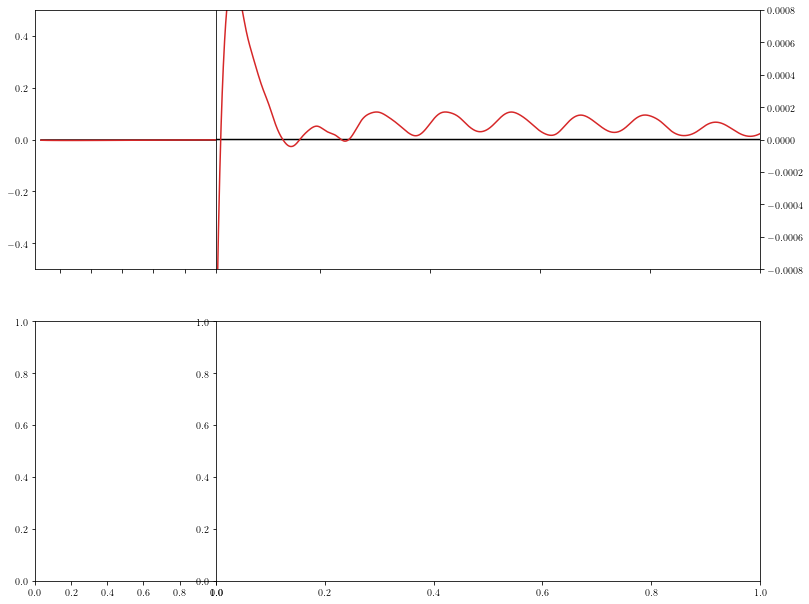

In [260]:
ms=2

fs=14

plt.rcParams['figure.figsize'] = [13, 10.5]
fig, axs = plt.subplots(nrows=2, ncols=2,gridspec_kw={'width_ratios': [1, 3]})

fig.subplots_adjust(wspace=0)
ax1 = axs[0,0]
#ax1.errorbar(cl_obs_tt_full[:l2max,0], resid2,yerr=resid2_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax1.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax1.plot(l[:30], diff[:30],c=color_sequence[3])


ax1.set_ylim(-0.5,0.5)
ax1.set_xlim(1,30)
ax1.tick_params(labelbottom=False) 


ax2 = axs[0,1]
ax2.yaxis.tick_right()
#ax2.errorbar(cl_obs_tt[:,0], resid,yerr=resid_err,fmt='o',color='black', markersize=ms,alpha=0.3)
ax2.plot(l,np.zeros(l.shape) ,c='black',ls='-')
ax2.plot(l, diff,c=color_sequence[3],label=r'NEDE')


ax2.tick_params(labelbottom=False) 
ax2.set_ylim(-0.0008,0.0008)
ax2.set_xlim(30,2500)

plt.show()

In [25]:
from scipy.integrate import quad

In [ ]:

D_star*0.015
